In [31]:
from signal_tl import Signal, Predicate, compute_robustness, F, G, TOP
from src.exemplify import exemplify
from src.specification import eq
import numpy as np
import time
import matplotlib.pyplot as plt

In [25]:
time_step = 0.1
time_horizon = 10

In [26]:
danger = (Predicate("y - x") < 10)
carx = ((Predicate("x'") > 5) & (Predicate("x'") < 27) & 
        (Predicate("x''") > -3) & (Predicate("x''") < 3) &
        (Predicate("x'''") > -5) & (Predicate("x'''") < 5))
cary = ((Predicate("y'") > 5) & (Predicate("y'") < 27) & 
        (Predicate("y''") > -3) & (Predicate("y''") < 3) &
        (Predicate("y'''") > -5) & (Predicate("y'''") < 5))

sim = (eq(Predicate("x"), 0) & eq(Predicate("y"), 45) & 
        F(danger, (0, 7)) & 
        G(carx & cary & (Predicate("y - x") > 0))
)

def postprocess_trace(trace):
    return {**trace, "y - x": Signal(np.array(trace["y"].values) - np.array(trace["x"].values), trace["x"].times)}

In [35]:
def measure_exemplification_time(n_cp, iteration):
    elapsed = []
    for _ in range(iteration):
        t1 = time.time()
        trace, msg = exemplify(
            sim,
            TOP,
            [
                {"variable_name": "x", "n_control_points": n_cp, "max_derivative_order": 3},
                {"variable_name": "y", "n_control_points": n_cp, "max_derivative_order": 3},
            ],
            0,
            time_horizon,
            time_step,
            postprocess_trace=postprocess_trace,
        )
        if trace is None:
            print(msg)
        elapsed.append(time.time() - t1)
    return elapsed

n_cp_list = range(3, 12)
result = np.array([measure_exemplification_time(n_cp, 10) for n_cp in n_cp_list])

Timeout after 10.00 seconds
Timeout after 10.01 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.01 seconds
Timeout after 10.01 seconds
Timeout after 10.01 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.01 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.01 seconds
Timeout after 10.01 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.01 seconds
Timeout after 10.00 seconds
Timeout after 10.01 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds
Timeout after 10.00 seconds


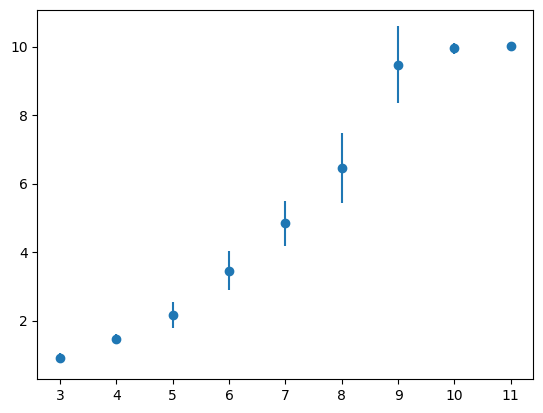

In [37]:
# plot mean, std of the elapsed time for each n_cp

plt.errorbar(n_cp_list, result.mean(axis=1), yerr=result.std(axis=1), fmt='o')
plt.show()